# LAB ASSIGNMENT 09 OF IMAGE SIGNAL PROCESSING

___

# *OTSU THRESHOLDING AND K-MEANS CLUSTERING*

___


## MANSI KAKKAR

## EE21S063



## Importing Libraries


In [42]:
import imageio as io
import numpy as np
import matplotlib.pyplot as plt

## Defining Global Thresholding using Otsu Thresholding Algorithm

Implement Otsu Threshold Algorithm for binary thresholding of images.

Considering image has $L$ possible intensity levels. We choose a threshold $t$ to segment the image into two parts.


Let $F_{i}$ represent the number of times intensity $i$ occurs in the image. Define $C_{1}$ as the set of pixels satisfying $\{i : 0\leq i \leq t\}$ and $C_{2}$ as the set of pixels satisfying $\{i : t< i \leq L-1\}$. The number of pixels in $C_{1}$ and $C_{2}$ be $N_{1}$ and $N_{2}$ respectively.

The means of class is :
$$
\mu_{j} = \frac{\Sigma_{i\in C_{j}}iF_{i}}{N_{j}}
$$

The variance of class is :
$$
\sigma^{2}_{j} = \frac{\Sigma_{i \in C_{j}}(i-\mu_{j})^{2}F_{i}}{N_{j}}
$$

The means of entire image is :
$$
\mu_{G} = \frac{\Sigma_{i=0}^{L-1}iF_{i}}{N}
$$

The variance of entire image is :
$$
\sigma^{2}_{G} = \frac{\Sigma_{i=0}^{L-1}(i-\mu_{G})^{2}F_{i}}{N}
$$

Within class variance is :

$$
\sigma^{2}_{w} = \frac{\Sigma_{j=1}^{2}\sigma_{j}^{2}N_{j}}{N}
$$

Between class variance is :
$$
\sigma^{2}_{b} = \frac{\Sigma_{j=1}^{2}(\mu_{j}-\mu_{G})^{2}N_{j}}{N}
$$


It can be shown that the between class variance can be rewritten as 

$$
\sigma^{2}_{b} = \frac{(\mu_{G}P_{1}-m)^{2}}{P_{1}(1-P_{1})}
$$

$P_{1}$ and $m$ are given as

$$
P_{1} = \frac{N_{1}}{N}
$$

$$
m = \frac{\Sigma_{i\in C_{1}}iF_{i}}{N} = \frac{\mu_{1}N_{1}}{N}
$$

The threshold is centered to make it more intuitive.The code will choose the threshold to $(i_{1}+i_{2})/2$ instead of $i_{1}$ which is more intuitive as it lies at the center of the two intensity levels.

In [43]:
def otsu_thresholding(image):
    
    #sorting intensity values
    thresholds = np.unique(image)
    #getting number of intensities
    n_thresholds = len(thresholds)
    #n_thresholds is 1 not thresholding possible 
    
    if n_thresholds == 1:
        return 0
    #if n_thresholds is 2 threshold value will be in the middle of them
    elif n_thresholds == 2:
        return np.mean(thresholds)
    
    #getting size of image
    N = image.shape[0]*image.shape[1]
    #image mean
    mu_t = np.mean(image)
    #initialising threshold value
    th1 = thresholds[0]
    #initialise pixel of class 1
    N1 = np.sum(image == th1)
    cumsum = N1*th1
    P1 = N1/N
    m = th1
    #initialising
    sigma_b = (mu_t*P1-m)**2/(P1*(1-P1))
    best_sigma_b = sigma_b
    #loop for finding best sigma and threshold value
    for i in range(1,n_thresholds-1):
        threshold = thresholds[i]
        Ni = np.sum(image == threshold)
        N1+= Ni
        cumsum+= Ni*threshold
        m = cumsum/N
        P1 = N1/N
        sigma_b = (mu_t*P1-m)**2/(P1*(1-P1))
        if sigma_b >= best_sigma_b:
            best_sigma_b = sigma_b
            th1 = (thresholds[i] + thresholds[i+1])/2
    return th1

## Obtaining Binary Image

In [52]:
def binary_image(image):
    im = np.zeros(np.shape(image))
    #obtaining threshold value
    threshold = otsu_thresholding(image)
    #intensities greater than threshold are assigned 1 else 0
    im[image>=threshold] = 1
    return im

## Reading Palm Leaf Images

In [55]:
palmleaf1 = io.imread('palmleaf1.png')
palmleaf2 = io.imread('palmleaf2.png')

## Performing Thresholding

In [54]:
print(otsu_thresholding(palmleaf1))
print(otsu_thresholding(palmleaf2))
plt_1 = binary_image(palmleaf1)
plt_2 = binary_image(palmleaf2)

104.5
50.5


In [56]:
palmleaf1.shape

(132, 208)

## RESULTS FOR OTSU THRESHOLDING

Text(0.5, 1.0, 'palmleaf2 after thresholding')

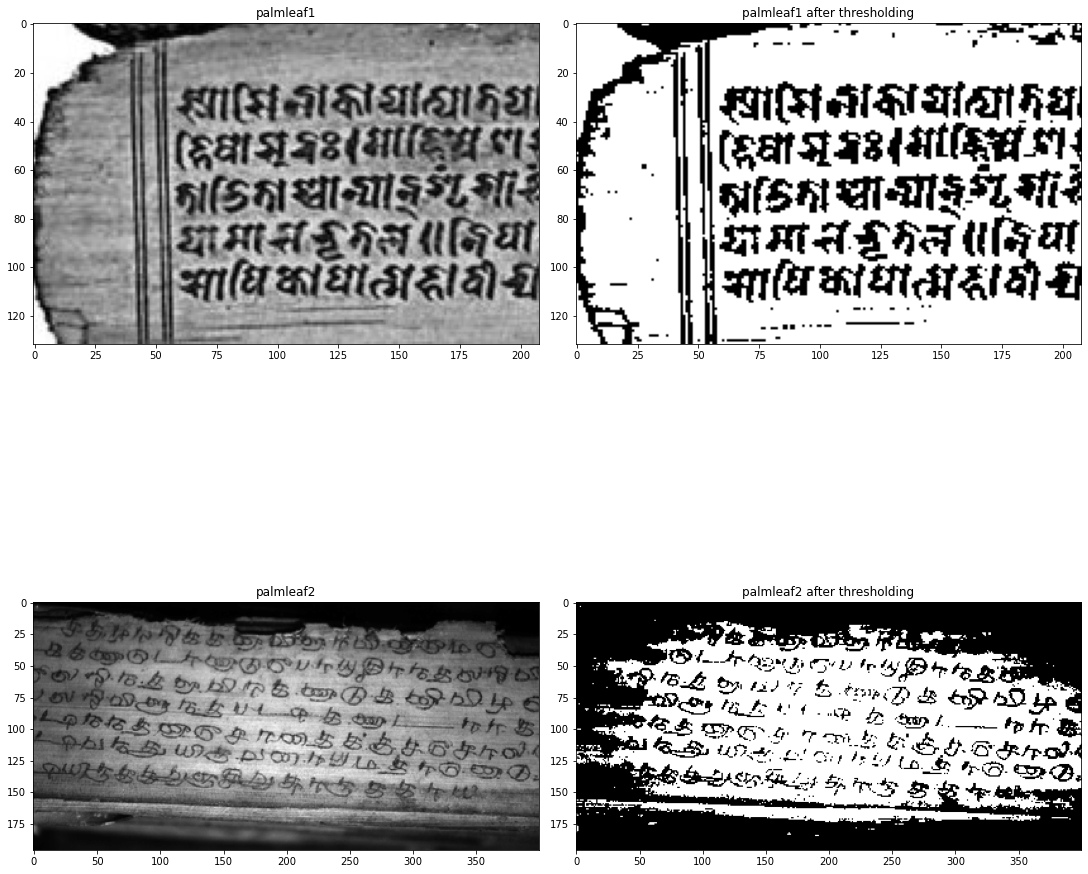

In [57]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize = (15,15),constrained_layout = True)
ax1.imshow(palmleaf1,'gray')
ax1.set_title('palmleaf1')
ax2.imshow(plt_1,'gray')
ax2.set_title('palmleaf1 after thresholding')
ax3.imshow(palmleaf2,'gray')
ax3.set_title('palmleaf2')
ax4.imshow(plt_2,'gray')
ax4.set_title('palmleaf2 after thresholding')


## Visualising the Effect of Thresholding through Histograms

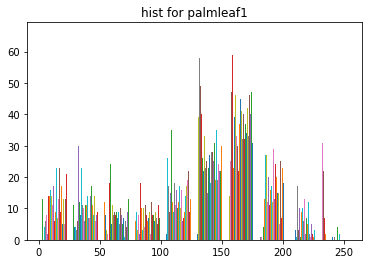

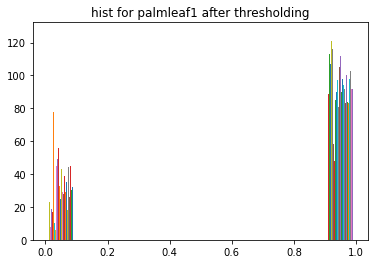

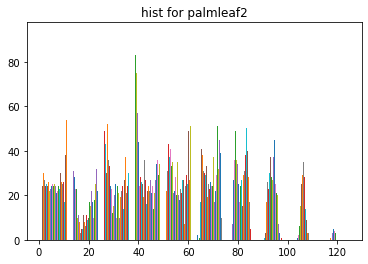

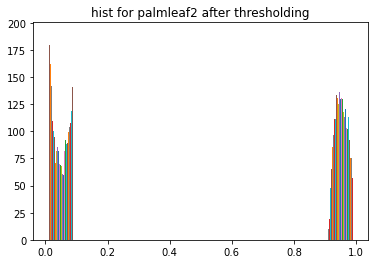

In [9]:
plt.title('hist for palmleaf1')
plt.hist(palmleaf1)
plt.show()
plt.title('hist for palmleaf1 after thresholding')
plt.hist(plt_1)
plt.show()
plt.title('hist for palmleaf2')
plt.hist(palmleaf2)
plt.show()
plt.title('hist for palmleaf2 after thresholding')
plt.hist(plt_2)
plt.show()

# K - MEANS METHOD

## Flattening the image

Flatten an image to apply the k-means algorithm on it.

Flattens an image to be of the shape $(x\times y, z)$, where $(x, y)$ are the dimensions of the image. $z$ is $3$ for RGB images.

In [10]:
def flatten(image):
    x,y,_ = np.shape(image)
    flattened = np.zeros((x*y, 3))
    for i in range(3):
        flattened[:,i] = np.ravel(image[:,:,i])
    return flattened

## K- Means Algorithm

Implementing K-Means as discussed in the class

In [11]:
def kmeans_clustering(image, centroids = None, k_means = 3, max_iterations = 5, n_inits = 30,
                         low = 0, high = 255, tolerance = 1e-12, set_centroids = False, seed = None):
    if not seed:
        np.random.seed(seed)
    #obtaining image shape
    x, y,_ = np.shape(image)
    flattened_img = flatten(image)
    final_image = np.zeros_like(flattened_img)
    flattened_image = flattened_img.copy()
    n_samples, n_features = np.shape(flattened_img)
    labels = np.random.randint(low=0, high=k_means, size=n_samples)
    #initialising distance
    euc_dist = np.zeros((k_means, n_samples))
    if centroids is not None:
        for i in range(max_iterations):
            for k in range(k_means):
                c = centroids[k]
                euc_dist[k] = np.sum((flattened_img - c)**2, axis = 1) 
                new_label = np.argmin(euc_dist, axis = 0)
                if(np.mean(np.abs(labels-new_label))<=tolerance):
                    labels = new_label
                    break
                else:
                    labels = new_label
                    for c in range(k_means):
                        centroids[c] = np.mean(flattened_img[labels == c], axis=0)
    #when initial points is not provided
    else:
        best_min = np.inf
        centroids = np.zeros((k_means, n_features))
        best_labels = labels.copy()
        for n in range(n_inits):
            #for each run of k-means, randomly initiate centers
            init = np.random.uniform(low, high, size=(k_means, n_features))
            for i in range(max_iterations):
                for k in range(k_means):
                    c = init[k]
                    euc_dist[k] = np.sum((flattened_img - c)**2, axis = 1)
                    new_label = np.argmin(euc_dist, axis = 0)
                    if(np.mean(np.abs(labels-new_label))<=tolerance):
                        labels = new_label
                        break
                    else:
                        labels = new_label
                        av_label = set(labels)
                        for c in range(k_means):
                            if c in av_label:
                                init[c] = np.mean(flattened_img[labels == c], axis=0)
                            else:
                                init[c] = np.random.uniform(low, high, n_features)
            min_dist = np.sum(np.min(euc_dist), axis=0)
            if min_dist < best_min:
                best_min = min_dist
                centroids = init
                best_label = labels
        labels = best_label
    #Using labels and centroids in the image 
    #The points in a cluster are assigned the colours of their respective centroid. 
    all_labels = set(labels)
    for label in all_labels:
        if not set_centroids:
            # in this case, to all pixels with label k, assign their average color
            final_image[labels == label] = np.mean(flattened_image[labels == label], axis=0)
        else:
            # in this case, to all pixels with label k, assign the kth centroid.
            final_image[labels == label] = centroids[label]
    final_image = final_image/high
    return final_image.reshape(x, y, 3)

## Reading Images

In [13]:
car = io.imread('car.png')
flower = io.imread('flower.png')

# RESULTS

Text(0.5, 1.0, 'csr after thresholding')

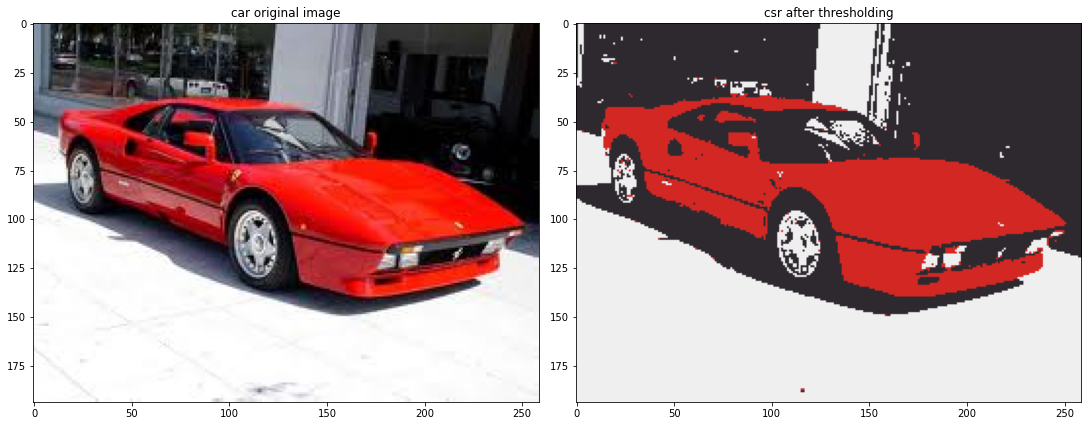

In [67]:
c_init = np.zeros((3, 3))
c_init[0, 0] = 255
c_init[2] = 255
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15,15),constrained_layout = True)
ax1.imshow(car)
ax1.set_title('car original image')
ax2.imshow(kmeans_clustering(car, centroids=c_init))
ax2.set_title('csr after thresholding')

Text(0.5, 1.0, 'car after thresholding')

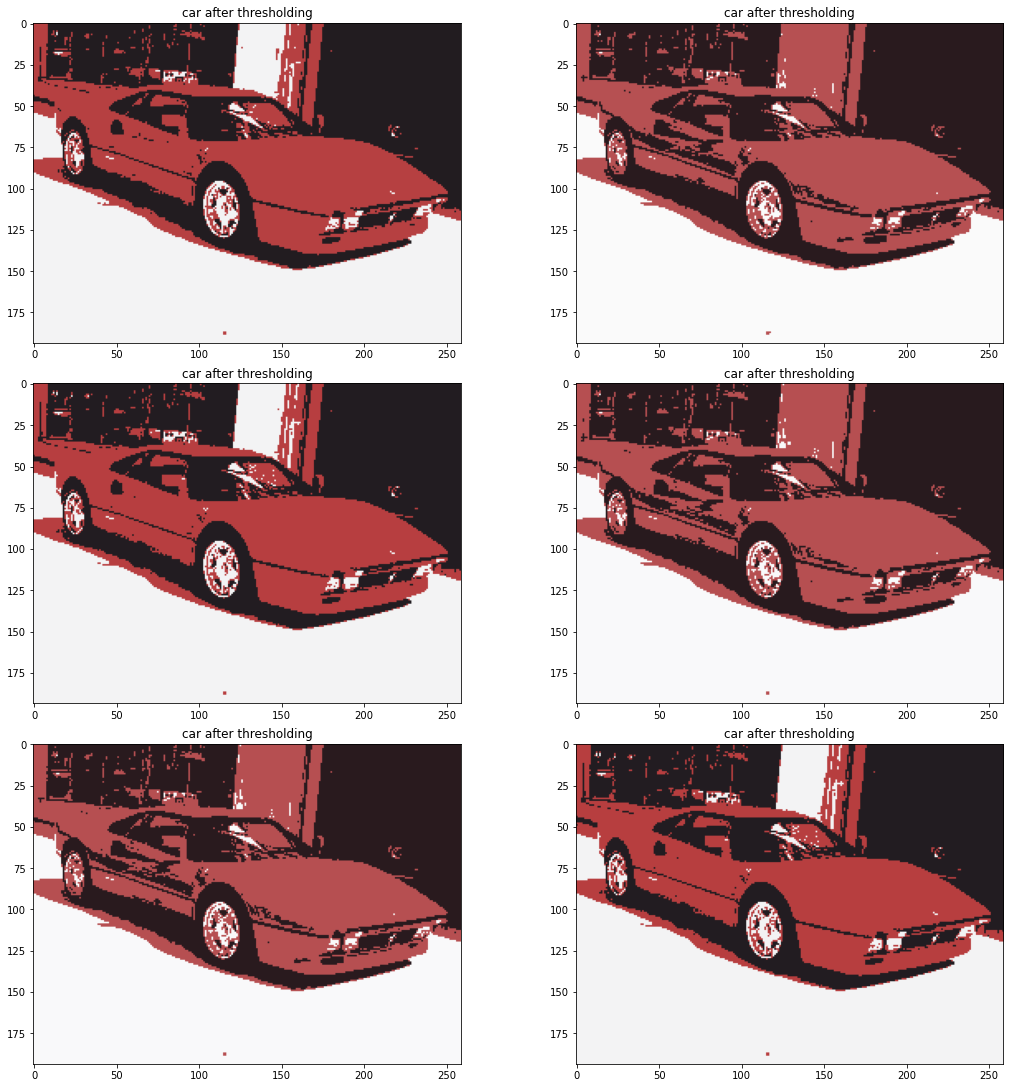

In [68]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize = (15,15),constrained_layout = True)
ax1.imshow(kmeans_clustering(car, centroids=c_init))
ax1.set_title('car after thresholding')
ax2.imshow(kmeans_clustering(car,seed=1791278654))
ax2.set_title('car after thresholding')
ax3.imshow(kmeans_clustering(car,seed=1795678654))
ax3.set_title('car after thresholding')
ax4.imshow(kmeans_clustering(car))
ax4.set_title('car after thresholding')
ax5.imshow(kmeans_clustering(car))
ax5.set_title('car after thresholding')
ax6.imshow(kmeans_clustering(car, max_iterations = 5,seed=7682344))
ax6.set_title('car after thresholding')

Text(0.5, 1.0, 'car after thresholding')

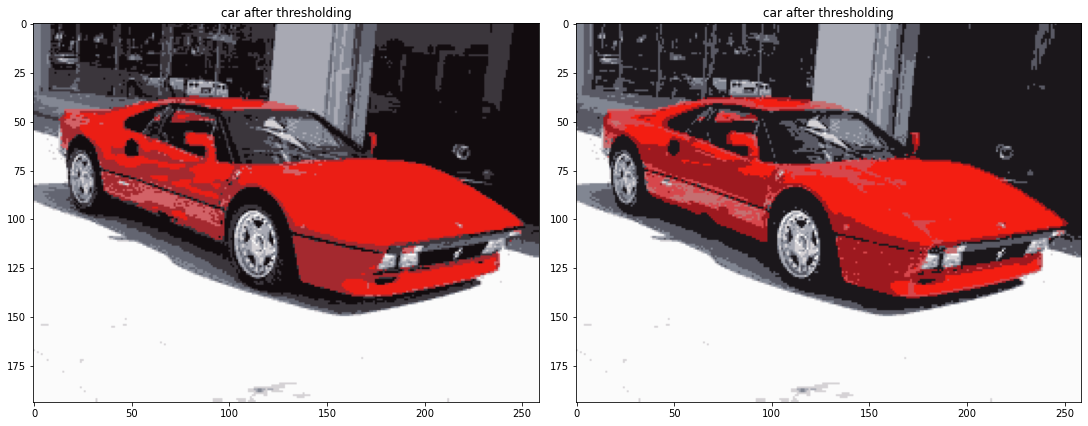

In [69]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15,15),constrained_layout = True)
ax1.imshow(kmeans_clustering(car, k_means = 10, max_iterations=5))
ax1.set_title('car after thresholding')
ax2.imshow(kmeans_clustering(car, k_means = 10, max_iterations=10))
ax2.set_title('car after thresholding')

Text(0.5, 1.0, 'flower after thresholding')

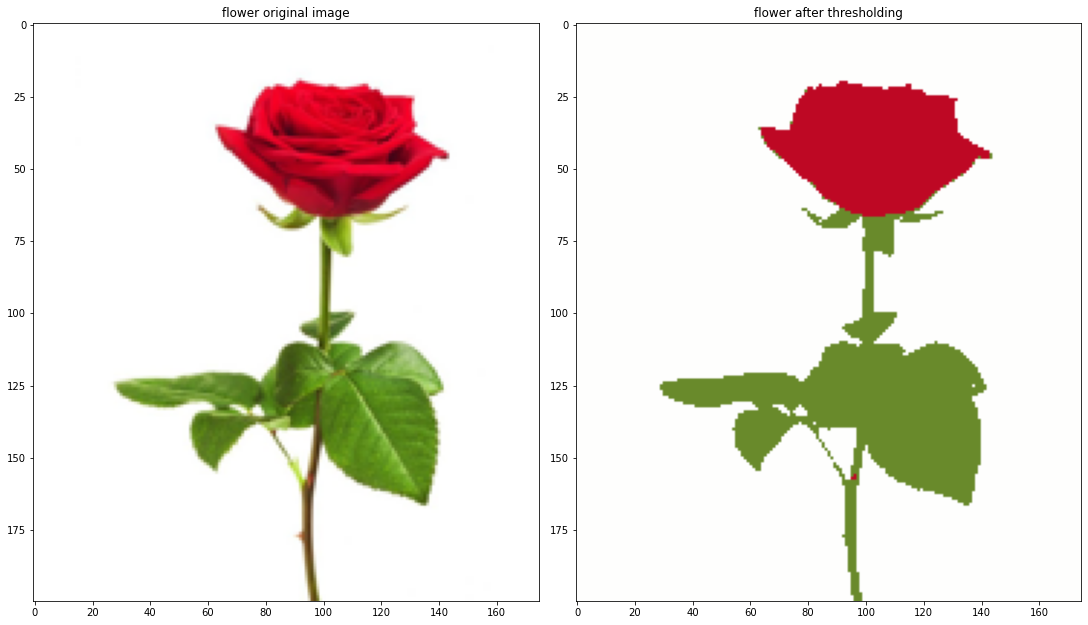

In [74]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15,15),constrained_layout = True)
ax1.imshow(flower)
ax1.set_title('flower original image')
ax2.imshow(kmeans_clustering(flower, max_iterations=5, seed=133422966))
ax2.set_title('flower after thresholding')

Text(0.5, 1.0, 'flower after thresholding')

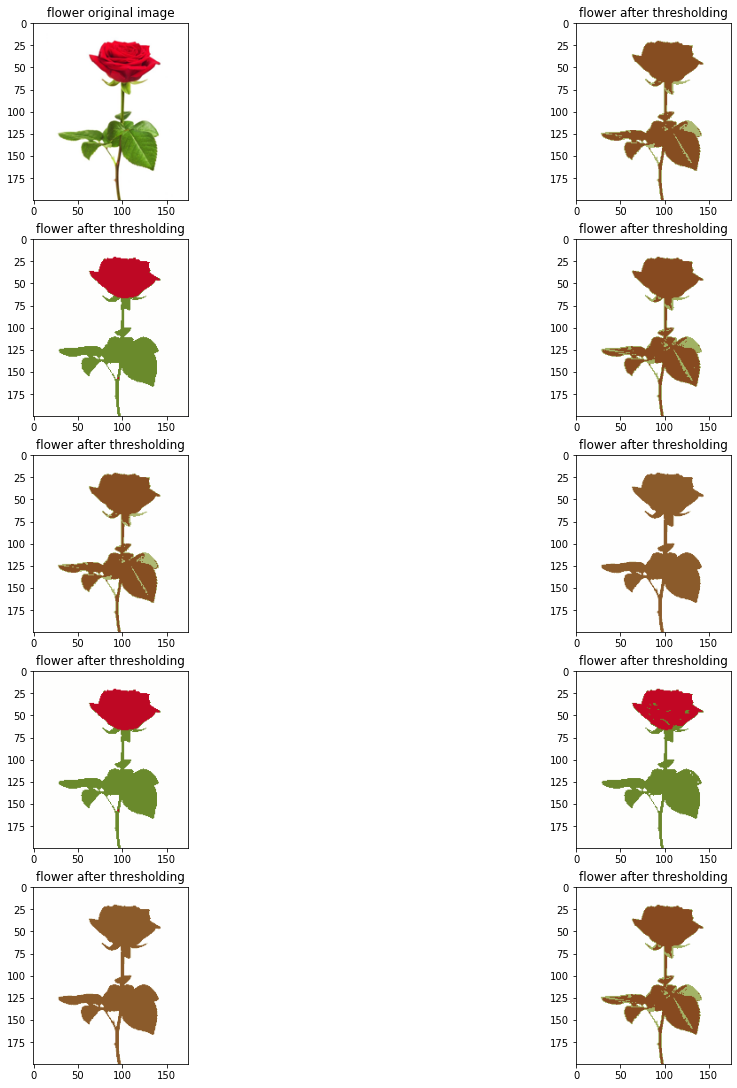

In [71]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7,ax8),(ax9, ax10)) = plt.subplots(5, 2, figsize = (15,15),constrained_layout = True)
ax1.imshow(flower)
ax1.set_title('flower original image')
ax2.imshow(kmeans_clustering(flower, centroids=c_init,max_iterations = 5, seed=773890966))
ax2.set_title('flower after thresholding')
ax3.imshow(kmeans_clustering(flower, max_iterations = 5))
ax3.set_title('flower after thresholding')
ax4.imshow(kmeans_clustering(flower, max_iterations = 5))
ax4.set_title('flower after thresholding')
ax5.imshow(kmeans_clustering(flower, max_iterations = 5))
ax5.set_title('flower after thresholding')
ax6.imshow(kmeans_clustering(flower, max_iterations = 5))
ax6.set_title('flower after thresholding')
ax7.imshow(kmeans_clustering(flower, max_iterations = 5))
ax7.set_title('flower after thresholding')
ax8.imshow(kmeans_clustering(flower, max_iterations = 5))
ax8.set_title('flower after thresholding')
ax9.imshow(kmeans_clustering(flower, max_iterations = 5))
ax9.set_title('flower after thresholding')
ax10.imshow(kmeans_clustering(flower, max_iterations = 5))
ax10.set_title('flower after thresholding')

Text(0.5, 1.0, 'flower after thresholding')

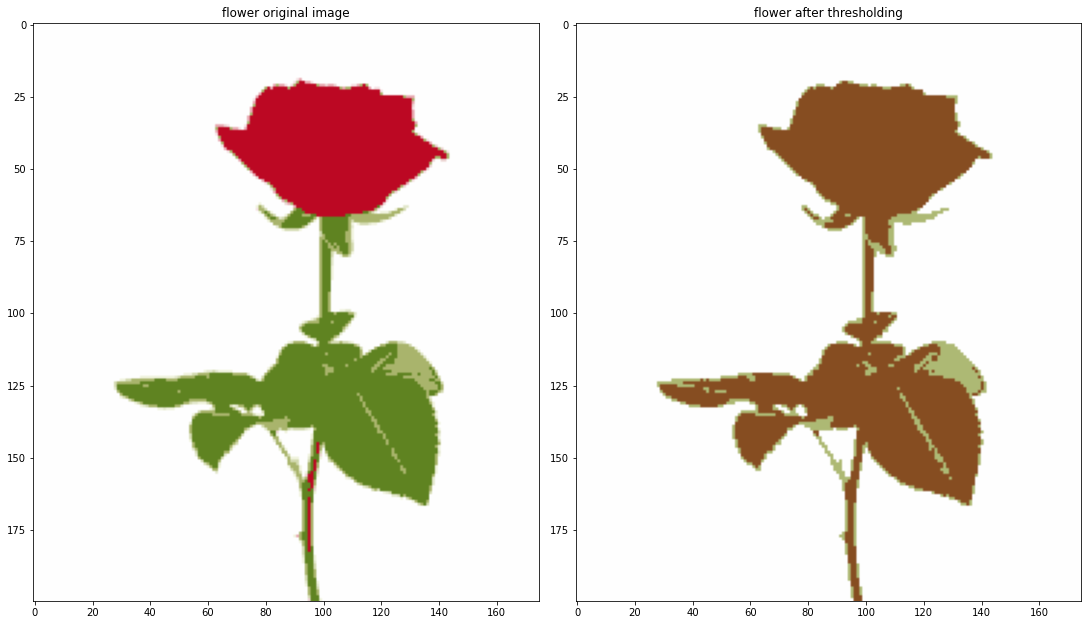

In [78]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15,15),constrained_layout = True)
ax1.imshow(kmeans_clustering(flower, k_means = 10, max_iterations=5))
ax1.set_title('flower original image')
ax2.imshow(kmeans_clustering(flower, k_means = 3, max_iterations=10))
ax2.set_title('flower after thresholding')

# OBSERVATIONS

The following observations can be made:
    
* In Otsu's Thresholding method we can observe that binary image after thresholding on palmleaf 1 gives better output than the one on palmleaf 2, because of the illumination gradient in image 2 as moving from the center
* Increasing the number of k_means can improve the output to a much larger extent, we get better image, given same number of iterations.
* The results that we get after k_means is very random and we get different results many times, as we can observe by the different iterations we have performed, for both car and flower image, sometimes image is appealing and sometimes not at less k-means
* as we increase k-means we get better look of segmented image, however, it comes with the issue of grouping very similar pixels into different clusters.
